## Bird Classifier App:

In [23]:
%pip install fastai --q
%pip install gradio --q



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr 


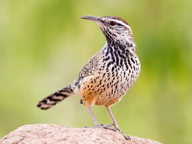

In [4]:
im = PILImage.create('cactus_wren.jpg')
im.thumbnail((192, 192))
im

In [5]:
#|export
from contextlib import contextmanager
import pathlib

@contextmanager
def set_posix_windows():
    posix_backup = pathlib.PosixPath
    try:
        pathlib.PosixPath = pathlib.WindowsPath
        yield
    finally:
        pathlib.PosixPath = posix_backup
        

In [6]:
#|export

#Exporting our model file:


EXPORT_PATH = pathlib.Path('model.pkl')

with set_posix_windows():
    learn = load_learner(EXPORT_PATH)

In [7]:
%%time
learn.predict(im)

CPU times: total: 500 ms
Wall time: 369 ms


('CACTUS WREN',
 tensor(4),
 tensor([3.6549e-07, 1.6152e-04, 7.1560e-10, 2.8352e-09, 9.9983e-01, 7.8673e-08,
         7.6682e-09, 7.4943e-09, 5.8849e-10, 2.5682e-06, 3.0625e-06, 9.9420e-08,
         3.6045e-08, 3.1295e-09, 6.2309e-09, 5.3801e-06, 4.7214e-09, 2.1328e-09,
         6.4662e-09, 1.3778e-09]))

- Now we build our function for the gradio app.<br>


In [8]:
#|export

'''categories = ('EASTERN TOWEE',
    'RING-BILLED GULL',
    'LILAC ROLLER',
    'CACTUS WREN',
    'MALACHITE KINGFISHER',
    'EURASIAN MAGPIE',
    'TRUMPTER SWAN',
    'HOODED MERGANSER',
    'RAZORBILL',
    'TREE SWALLOW',
    'MOURNING DOVE',
    'TURKEY VULTURE',
    'PEREGRINE FALCON',
    'BAR-TAILED GODWIT',
    'BLACK SWAN',
    'BALTIMORE ORIOLE',
    'BLUE HERON',
    'MIKADO PHEASANT',
    'WHITE CHEEKED TURACO',
    'GOLDEN CHLOROPHONIA')'''

categories = learn.dls.vocab
print(categories)


def classify_images(image):
    pred, idx, probs = learn.predict(image)
    return dict(zip(categories, map(float, probs)))

['BALTIMORE ORIOLE', 'BAR-TAILED GODWIT', 'BLACK SWAN', 'BLUE HERON', 'CACTUS WREN', 'EASTERN TOWEE', 'EURASIAN MAGPIE', 'GOLDEN CHLOROPHONIA', 'HOODED MERGANSER', 'LILAC ROLLER', 'MALACHITE KINGFISHER', 'MIKADO PHEASANT', 'MOURNING DOVE', 'PEREGRINE FALCON', 'RAZORBILL', 'RING-BILLED GULL', 'TREE SWALLOW', 'TRUMPTER SWAN', 'TURKEY VULTURE', 'WHITE CHEEKED TURACO']


In [9]:
classify_images(im)

{'BALTIMORE ORIOLE': 3.654949409792607e-07,
 'BAR-TAILED GODWIT': 0.00016151898307725787,
 'BLACK SWAN': 7.155978587469747e-10,
 'BLUE HERON': 2.835236712073197e-09,
 'CACTUS WREN': 0.999826967716217,
 'EASTERN TOWEE': 7.867291884622318e-08,
 'EURASIAN MAGPIE': 7.668218948708727e-09,
 'GOLDEN CHLOROPHONIA': 7.494300291455147e-09,
 'HOODED MERGANSER': 5.884899234587238e-10,
 'LILAC ROLLER': 2.5681899842311395e-06,
 'MALACHITE KINGFISHER': 3.0625467388745164e-06,
 'MIKADO PHEASANT': 9.942002066054556e-08,
 'MOURNING DOVE': 3.6045406659468426e-08,
 'PEREGRINE FALCON': 3.1295401825559566e-09,
 'RAZORBILL': 6.230936655526875e-09,
 'RING-BILLED GULL': 5.380146831157617e-06,
 'TREE SWALLOW': 4.7214059328837266e-09,
 'TRUMPTER SWAN': 2.1328343535742533e-09,
 'TURKEY VULTURE': 6.4661613841110466e-09,
 'WHITE CHEEKED TURACO': 1.3778179708268112e-09}

In [10]:
#|export

# Building the gradio application interface:


inp_img = gr.inputs.Image(shape=(192, 192))
labels = gr.outputs.Label()
example_img = [ 'baltimore_oriole.jpg', 'bar_tailed_godwit.jpg',
               'black_swan.jpg', 'blue_heron.jpg', 'cactus_wren.jpg', 'eastern_towee.jpg', 'golden_chlorophonia.jpg',
               'lilac_roller.jpg', 'malachite_kingfisher.jpg', 'mikado_pheasant.jpg', 'mourning_dove.jpg',
               'peregine_falcon.jpg', 'razorbill.jpg', 'ring_billed_gull.jpg', 
               'tree_swallow.jpg', 'trumpter_swan.jpg', 'white_cheeked_turaco.jpg']


intf = gr.Interface(fn=classify_images, inputs=inp_img, outputs=labels, examples=example_img)
intf.launch(inline=False)

C:\Users\acer\AppData\Local\Temp\ipykernel_9712\216552177.py:6: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inp_img = gr.inputs.Image(shape=(192, 192))
C:\Users\acer\AppData\Local\Temp\ipykernel_9712\216552177.py:6: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inp_img = gr.inputs.Image(shape=(192, 192))
C:\Users\acer\AppData\Local\Temp\ipykernel_9712\216552177.py:7: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  labels = gr.outputs.Label()
C:\Users\acer\AppData\Local\Temp\ipykernel_9712\216552177.py:7: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  labels = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


#### Exporting the notebook to a python script:


In [33]:
from nbdev.export import nb_export

In [34]:
nb_export('app.ipynb', 'app.py')